# Key Input Technique Study
### Author: Sarah
### Reviewer: Claudia

## Structured Analysis
### Import all relevant libraries

In [2]:
!pip3 install pingouin

In [3]:
import pandas as pd
import pingouin as pg
import seaborn as sns
from matplotlib import pyplot as plt

### Read csv file

In [4]:
raw_data_normal_1_1 = pd.read_csv("./normal_marc_aurel_id_1.csv", sep=';', engine='python')
raw_data_normal_1_2 = pd.read_csv("./normal_paola_mastrocola_id_1.csv", sep=';', engine='python')

raw_data_normal_2_1 = pd.read_csv("./normal_paola_mastrocola_id_2.csv", sep=';', engine='python')
raw_data_normal_2_2 = pd.read_csv("./normal_marc_aurel_id_2.csv", sep=';', engine='python')

raw_data_normal_3_1 = pd.read_csv("./normal_paola_mastrocola_id_3.csv", sep=';', engine='python')
raw_data_normal_3_2 = pd.read_csv("./normal_marc_aurel_id_3.csv", sep=';', engine='python')

raw_data_normal_4_1 = pd.read_csv("./normal_marc_aurel_id_4.csv", sep = ';', engine = 'python')
raw_data_normal_4_2 = pd.read_csv("./normal_paola_mastrocola_id_4.csv", sep = ';', engine='python')

raw_data_auto_complete_1_1 = pd.read_csv("./auto_complete_paola_mastrocola_id_1.csv", sep=';', engine='python')
raw_data_auto_complete_1_2 = pd.read_csv("./auto_complete_marc_aurel_id_1.csv", sep=';', engine='python')

raw_data_auto_complete_2_1 = pd.read_csv("./auto_complete_paola_mastrocola_id_2.csv", sep=';', engine='python')
raw_data_auto_complete_2_2 = pd.read_csv("./auto_complete_marc_aurel_id_2.csv", sep=';', engine='python')

raw_data_auto_complete_3_1 = pd.read_csv("./auto_complete_marc_aurel_id_3.csv", sep=';', engine='python')
raw_data_auto_complete_3_2 = pd.read_csv("./auto_complete_paola_mastrocola_id_3.csv", sep=';', engine='python')

raw_data_auto_complete_4_1 = pd.read_csv("./auto_complete_paola_mastrocola_id_4.csv", sep = ';', engine = 'python')
raw_data_auto_complete_4_2 = pd.read_csv("./auto_complete_marc_aurel_id_4.csv", sep = ';', engine = 'python')


### Combine the individual tables of the participants and save them

In [5]:
normal_input_technique = pd.concat([
    raw_data_normal_1_1,
    raw_data_normal_1_2,
    raw_data_normal_2_1,
    raw_data_normal_2_2,
    raw_data_normal_3_1,
    raw_data_normal_3_2,
    raw_data_normal_4_1,
    raw_data_normal_4_2
])

novel_input_technique = pd.concat([
    raw_data_auto_complete_1_1,
    raw_data_auto_complete_1_2,
    raw_data_auto_complete_2_1,
    raw_data_auto_complete_2_2,
    raw_data_auto_complete_3_1,
    raw_data_auto_complete_3_2,
    raw_data_auto_complete_4_1,
    raw_data_auto_complete_4_2
])

normal_input_technique.to_csv("normal_input_technique_table.csv", index=False)
normal_input_technique.to_csv("novel_input_technique_table.csv", index=False)

In [6]:
normal_input_technique

,log_type,participant_id,keyboard_type,txt_file,key_limit,key_code,key_value,content,timestamp,word_time_in_s,sentence_time_in_s,words_per_minute
0,key_pressed,1,normal,marc_aurel_selbstbetrachtungen.txt,2,71,G,G,2021-05-18 16:05:00.764843,NaN,NaN,90909.090909
1,key_pressed,1,normal,marc_aurel_selbstbetrachtungen.txt,2,76,l,Gl,2021-05-18 16:05:00.965212,NaN,NaN,119.692987
2,key_pressed,1,normal,marc_aurel_selbstbetrachtungen.txt,2,220,ü,Glü,2021-05-18 16:05:01.428062,NaN,NaN,54.269257
3,key_pressed,1,normal,marc_aurel_selbstbetrachtungen.txt,2,67,c,Glüc,2021-05-18 16:05:01.652044,NaN,NaN,54.094137
4,key_pressed,1,normal,marc_aurel_selbstbetrachtungen.txt,2,75,k,Glück,2021-05-18 16:05:02.011900,NaN,NaN,48.107761
...,...,...,...,...,...,...,...,...,...,...,...,...
370,key_pressed,4,normal,paola_mastrocola_ich_waer_so_gern_ein_pinguin.txt,2,85,u,oder eben ein Pingu,2021-05-18 21:30:14.525973,NaN,NaN,76.883052
371,key_pressed,4,normal,paola_mastrocola_ich_waer_so_gern_ein_pinguin.txt,2,73,i,oder eben ein Pingui,2021-05-18 21:30:14.579042,NaN,NaN,77.066037
372,key_pressed,4,normal,paola_mastrocola_ich_waer_so_gern_ein_pinguin.txt,2,78,n,oder eben ein Pinguin,2021-05-18 21:30:14.789911,NaN,NaN,76.968297
373,word_finished,4,normal,paola_mastrocola_ich_waer_so_gern_ein_pinguin.txt,2,33,!,oder eben ein Pinguin!,2021-05-18 21:30:15.917492,2.279407,NaN,75.023529


In [7]:
novel_input_technique

,log_type,participant_id,keyboard_type,txt_file,key_limit,key_code,key_value,content,timestamp,word_time_in_s,sentence_time_in_s,words_per_minute
0,key_pressed,1,auto_complete,paola_mastrocola_ich_waer_so_gern_ein_pinguin.txt,2,87,W,W,2021-05-18 16:10:51.594541,NaN,NaN,82758.620690
1,key_pressed,1,auto_complete,paola_mastrocola_ich_waer_so_gern_ein_pinguin.txt,2,196,ä,Wä,2021-05-18 16:10:51.994412,NaN,NaN,59.996250
2,word_finished,1,auto_complete,paola_mastrocola_ich_waer_so_gern_ein_pinguin.txt,2,32,,Wäre,2021-05-18 16:10:53.770152,2.175529,NaN,22.061297
3,key_pressed,1,auto_complete,paola_mastrocola_ich_waer_so_gern_ein_pinguin.txt,2,69,e,Wäre e,2021-05-18 16:10:53.970387,NaN,NaN,25.252621
4,key_pressed,1,auto_complete,paola_mastrocola_ich_waer_so_gern_ein_pinguin.txt,2,73,i,Wäre ei,2021-05-18 16:10:54.089741,NaN,NaN,28.853737
...,...,...,...,...,...,...,...,...,...,...,...,...
221,key_pressed,4,auto_complete,marc_aurel_selbstbetrachtungen.txt,2,79,o,Ich zürne dir deswegen nicht; nur geh bald fo,2021-05-18 21:28:28.764192,NaN,NaN,76.838861
222,key_pressed,4,auto_complete,marc_aurel_selbstbetrachtungen.txt,2,82,r,Ich zürne dir deswegen nicht; nur geh bald for,2021-05-18 21:28:28.875736,NaN,NaN,76.941126
223,key_pressed,4,auto_complete,marc_aurel_selbstbetrachtungen.txt,2,84,t,Ich zürne dir deswegen nicht; nur geh bald fort,2021-05-18 21:28:29.027359,NaN,NaN,76.951041
224,word_finished,4,auto_complete,marc_aurel_selbstbetrachtungen.txt,2,46,.,Ich zürne dir deswegen nicht; nur geh bald fort.,2021-05-18 21:28:29.059347,0.375772,NaN,76.878040


In [8]:
# whole data set
input_technique_table = pd.concat([
    normal_input_technique,
    novel_input_technique
])

input_technique_table

,log_type,participant_id,keyboard_type,txt_file,key_limit,key_code,key_value,content,timestamp,word_time_in_s,sentence_time_in_s,words_per_minute
0,key_pressed,1,normal,marc_aurel_selbstbetrachtungen.txt,2,71,G,G,2021-05-18 16:05:00.764843,NaN,NaN,90909.090909
1,key_pressed,1,normal,marc_aurel_selbstbetrachtungen.txt,2,76,l,Gl,2021-05-18 16:05:00.965212,NaN,NaN,119.692987
2,key_pressed,1,normal,marc_aurel_selbstbetrachtungen.txt,2,220,ü,Glü,2021-05-18 16:05:01.428062,NaN,NaN,54.269257
3,key_pressed,1,normal,marc_aurel_selbstbetrachtungen.txt,2,67,c,Glüc,2021-05-18 16:05:01.652044,NaN,NaN,54.094137
4,key_pressed,1,normal,marc_aurel_selbstbetrachtungen.txt,2,75,k,Glück,2021-05-18 16:05:02.011900,NaN,NaN,48.107761
...,...,...,...,...,...,...,...,...,...,...,...,...
221,key_pressed,4,auto_complete,marc_aurel_selbstbetrachtungen.txt,2,79,o,Ich zürne dir deswegen nicht; nur geh bald fo,2021-05-18 21:28:28.764192,NaN,NaN,76.838861
222,key_pressed,4,auto_complete,marc_aurel_selbstbetrachtungen.txt,2,82,r,Ich zürne dir deswegen nicht; nur geh bald for,2021-05-18 21:28:28.875736,NaN,NaN,76.941126
223,key_pressed,4,auto_complete,marc_aurel_selbstbetrachtungen.txt,2,84,t,Ich zürne dir deswegen nicht; nur geh bald fort,2021-05-18 21:28:29.027359,NaN,NaN,76.951041
224,word_finished,4,auto_complete,marc_aurel_selbstbetrachtungen.txt,2,46,.,Ich zürne dir deswegen nicht; nur geh bald fort.,2021-05-18 21:28:29.059347,0.375772,NaN,76.878040


### Filter the data with relevant columns for analysis of task completion time and save the result

In [9]:
filtered_data = input_technique_table[
    ["log_type", "participant_id", "keyboard_type", "content", "sentence_time_in_s", "words_per_minute", "word_time_in_s"]]

filtered_data.to_csv("filtered_data.csv", index=False)

filtered_data

,log_type,participant_id,keyboard_type,content,sentence_time_in_s,words_per_minute,word_time_in_s
0,key_pressed,1,normal,G,NaN,90909.090909,NaN
1,key_pressed,1,normal,Gl,NaN,119.692987,NaN
2,key_pressed,1,normal,Glü,NaN,54.269257,NaN
3,key_pressed,1,normal,Glüc,NaN,54.094137,NaN
4,key_pressed,1,normal,Glück,NaN,48.107761,NaN
...,...,...,...,...,...,...,...
221,key_pressed,4,auto_complete,Ich zürne dir deswegen nicht; nur geh bald fo,NaN,76.838861,NaN
222,key_pressed,4,auto_complete,Ich zürne dir deswegen nicht; nur geh bald for,NaN,76.941126,NaN
223,key_pressed,4,auto_complete,Ich zürne dir deswegen nicht; nur geh bald fort,NaN,76.951041,NaN
224,word_finished,4,auto_complete,Ich zürne dir deswegen nicht; nur geh bald fort.,NaN,76.878040,0.375772


In [10]:
words_per_minute = filtered_data[filtered_data["log_type"] == "test_finished"]
words_per_minute = words_per_minute[["log_type", "participant_id", "keyboard_type", "content", "words_per_minute"]]
words_per_minute

,log_type,participant_id,keyboard_type,content,words_per_minute
278,test_finished,1,normal,Ich zürne dir deswegen nicht; nur geh bald fort.,32.955710
354,test_finished,1,normal,Oder eben ein Pinguin!,30.627758
387,test_finished,2,normal,Oder eben ein Pinguin!,41.584860
294,test_finished,2,normal,Ich zürne dir deswegen nicht; nur geh bald fort.,44.960516
376,test_finished,3,normal,Oder eben ein Pinguin!,40.317145
285,test_finished,3,normal,Ich zürne dir deswegen nicht; nur geh bald fort.,45.951067
281,test_finished,4,normal,Ich zürne dir deswegen nicht; nur geh bald fort.,84.286532
374,test_finished,4,normal,oder eben ein Pinguin!,74.714238
232,test_finished,1,auto_complete,Oder eben ein Pinguin!,25.677784
173,test_finished,1,auto_complete,Ich zürne dir deswegen nicht; nur geh bald fort.,24.278825


In [11]:
time_per_sentence = filtered_data[(filtered_data["log_type"] == "sentence_finished")
                                  | (filtered_data["log_type"] == "test_finished")]
time_per_sentence = time_per_sentence[["log_type", "participant_id", "keyboard_type", "content", "sentence_time_in_s"]]
time_per_sentence

,log_type,participant_id,keyboard_type,content,sentence_time_in_s
61,sentence_finished,1,normal,Glücklich sein heißt einene guten Genius haben...,14.631612
100,sentence_finished,1,normal,"Was amchst du also hier, Einbildung?",11.387144
180,sentence_finished,1,normal,"GEh, um der Götter willen, wie du gekommen bis...",19.719190
227,sentence_finished,1,normal,Du bist gekommen nach deiner alten Gewohnheit.,12.502374
278,test_finished,1,normal,Ich zürne dir deswegen nicht; nur geh bald fort.,17.610172
...,...,...,...,...,...
51,sentence_finished,4,auto_complete,Glücklich sein heißt einen guten Genius haben ...,8.095917
79,sentence_finished,4,auto_complete,"Was machst du also hier, Einbildung?",4.504821
144,sentence_finished,4,auto_complete,"Geh, um der Götter willen, wie du gekommen bis...",8.151670
181,sentence_finished,4,auto_complete,Du bist gekommen nach deiner alten Gewohnheit.,5.992719


In [12]:
time_per_word = filtered_data[(filtered_data["log_type"] == "word_finished")]
time_per_word = time_per_word[["log_type", "participant_id", "keyboard_type", "content", "word_time_in_s"]]
time_per_word

,log_type,participant_id,keyboard_type,content,word_time_in_s
9,word_finished,1,normal,Glücklich,2.430893
14,word_finished,1,normal,Glücklich sein,0.670232
20,word_finished,1,normal,Glücklich sein heißt,1.181658
27,word_finished,1,normal,Glücklich sein heißt einene,0.774923
33,word_finished,1,normal,Glücklich sein heißt einene guten,1.175977
...,...,...,...,...,...
206,word_finished,4,auto_complete,Ich zürne dir deswegen nicht;,NaN
210,word_finished,4,auto_complete,Ich zürne dir deswegen nicht; nur,0.296971
214,word_finished,4,auto_complete,Ich zürne dir deswegen nicht; nur geh,0.184133
219,word_finished,4,auto_complete,Ich zürne dir deswegen nicht; nur geh bald,0.312319


## Statistics for all tables

In [13]:
input_technique_table.describe()  # total

,participant_id,key_limit,key_code,word_time_in_s,sentence_time_in_s,words_per_minute
count,4673.000000,4673.0,4.673000e+03,885.000000,102.000000,4673.000000
mean,2.544190,2.0,9.083970e+05,0.928501,10.934721,432.094196
std,1.098832,0.0,3.796997e+06,0.747494,6.225037,7768.251773
min,1.000000,2.0,3.200000e+01,0.109834,0.752660,20.042294
25%,2.000000,2.0,6.600000e+01,0.399839,5.963483,39.540221
50%,3.000000,2.0,7.200000e+01,0.671825,9.983683,43.883164
75%,4.000000,2.0,8.200000e+01,1.184893,14.806926,56.513006
max,4.000000,2.0,1.677724e+07,5.533013,33.392906,307692.307692


In [14]:
normal_input_technique.describe()  # normal input technique

,participant_id,key_limit,key_code,word_time_in_s,sentence_time_in_s,words_per_minute
count,2637.000000,2637.0,2.637000e+03,438.000000,48.000000,2637.000000
mean,2.509291,2.0,7.762596e+05,0.882793,10.796867,485.660470
std,1.108839,0.0,3.524839e+06,0.772205,5.719423,9314.985796
min,1.000000,2.0,3.200000e+01,0.128598,2.018106,24.025833
25%,2.000000,2.0,6.700000e+01,0.381057,6.247203,41.161672
50%,3.000000,2.0,7.200000e+01,0.584489,9.983683,44.670952
75%,3.000000,2.0,8.200000e+01,1.048232,15.464119,76.883052
max,4.000000,2.0,1.677722e+07,5.034446,23.410542,307692.307692


In [15]:
novel_input_technique.describe()  # novel input technique

,participant_id,key_limit,key_code,word_time_in_s,sentence_time_in_s,words_per_minute
count,2036.000000,2036.0,2.036000e+03,447.000000,54.000000,2036.000000
mean,2.589391,2.0,1.079540e+06,0.973288,11.057258,362.715873
std,1.084338,0.0,4.117469e+06,0.720515,6.693679,5112.730689
min,1.000000,2.0,3.200000e+01,0.109834,0.752660,20.042294
25%,2.000000,2.0,6.500000e+01,0.425368,5.860641,39.023754
50%,3.000000,2.0,7.100000e+01,0.848822,10.293955,43.152380
75%,4.000000,2.0,8.000000e+01,1.270332,13.951611,53.183031
max,4.000000,2.0,1.677724e+07,5.533013,33.392906,102564.102564


## Visualizations

### Scatter plots for words per minute when task was finished

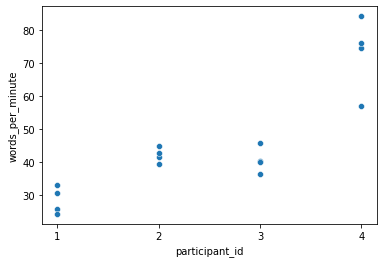

In [16]:
scatter_plot_ids = sns.scatterplot(
    data=words_per_minute,
    x="participant_id",
    y="words_per_minute",
)
scatter_plot_ids.set(xlabel="participant_id", ylabel="words_per_minute", xticks=[1, 2, 3, 4])
plt.show()

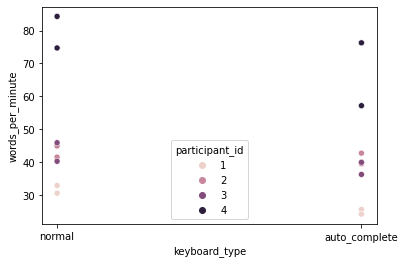

In [17]:
scatter_plot_con = sns.scatterplot(
    data=words_per_minute,
    x="keyboard_type",
    y="words_per_minute",
    hue="participant_id"
)
scatter_plot_con.set(xlabel="keyboard_type", ylabel="words_per_minute")
plt.show()

### Swarm plots for task completion time

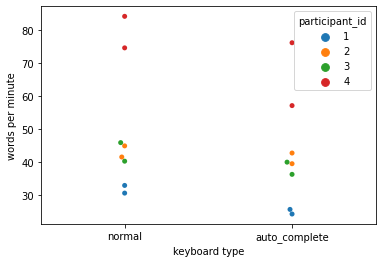

In [18]:
swarm_plot_con_normal = sns.swarmplot(
    data=words_per_minute,
    y="words_per_minute",
    x="keyboard_type",
    hue="participant_id"
)
swarm_plot_con_normal.set(xlabel="keyboard type", ylabel="words per minute")
# plt.savefig("swarm_plot_participants.png")
plt.show()

### Boxplots for task completion time

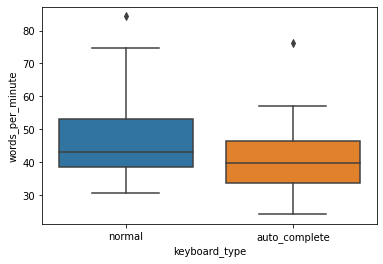

In [19]:
box_plot_con = sns.boxplot(
    data=words_per_minute,
    x="keyboard_type",
    y="words_per_minute"
)

box_plot_con.set(xlabel="keyboard_type", ylabel="words_per_minute")

plt.show()

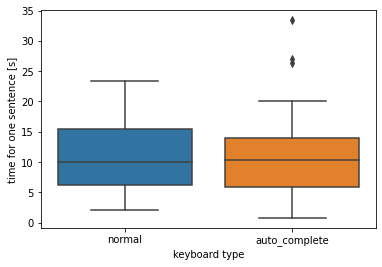

In [20]:
box_plot_time = sns.boxplot(
    data=time_per_sentence,
    x="keyboard_type",
    y="sentence_time_in_s"
)

box_plot_time.set(xlabel="keyboard type", ylabel="time for one sentence [s]")
plt.savefig('boxplot_time_per_sentence.png')
plt.show()

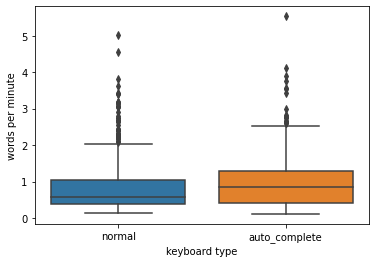

In [21]:
box_plot_wps = sns.boxplot(
    data=time_per_word,
    x="keyboard_type",
    y="word_time_in_s"
)

box_plot_wps.set(xlabel="keyboard type", ylabel="words per minute")
# plt.savefig('boxplot_wps.png')
plt.show()

## T-test

__Tests for variance homogeneity and normal distribution for words per minute__

In [22]:
pg.homoscedasticity(data=input_technique_table, dv="words_per_minute", group="keyboard_type", method="bartlett")

,T,pval,equal_var
bartlett,745.790451,3.301510e-164,False


In [23]:
pg.normality(data=input_technique_table, dv="words_per_minute", group="keyboard_type")

,W,pval,normal
normal,0.022966,0.0,False
auto_complete,0.036046,0.0,False


__There is no normal distribution, so according to Field (2009) the non-parametric Welch-Anova test is used.__

Source: 
Field, A. P. (2009). Discovering statistics using SPSS: And sex, drugs and rock „n“ roll (3rd ed). SAGE Publications.

In [24]:
pg.welch_anova(data=input_technique_table, dv="words_per_minute", between="keyboard_type")

,Source,ddof1,ddof2,F,p-unc,np2
0,keyboard_type,1,4255.221143,0.330439,0.565431,0.000062


__Tests for variance homogeneity and normal distribution for time for a sentence__

In [25]:
pg.homoscedasticity(data=input_technique_table, dv="sentence_time_in_s", group="keyboard_type", method="bartlett")

,T,pval,equal_var
bartlett,NaN,NaN,False


In [26]:
pg.normality(data=input_technique_table, dv="sentence_time_in_s", group="keyboard_type")

,W,pval,normal
normal,0.947041,0.030523,False
auto_complete,0.922578,0.001873,False


__There is no normal distribution, so according to Field (2009) the non-parametric Welch-Anova test is used.__

Source: 
Field, A. P. (2009). Discovering statistics using SPSS: And sex, drugs and rock „n“ roll (3rd ed). SAGE Publications.

In [27]:
pg.welch_anova(data=input_technique_table, dv="sentence_time_in_s", between="keyboard_type")

,Source,ddof1,ddof2,F,p-unc,np2
0,keyboard_type,1,99.854619,0.044867,0.832681,0.00044


### Tests for word time in s

In [28]:
pg.homoscedasticity(data=input_technique_table, dv="word_time_in_s", group="keyboard_type", method="bartlett")

,T,pval,equal_var
bartlett,NaN,NaN,False


In [29]:
pg.normality(data=input_technique_table, dv="word_time_in_s", group="keyboard_type")

,W,pval,normal
normal,0.769557,2.473934e-24,False
auto_complete,0.852283,4.503665e-20,False


In [30]:
pg.welch_anova(data=input_technique_table, dv="word_time_in_s", between="keyboard_type")

,Source,ddof1,ddof2,F,p-unc,np2
0,keyboard_type,1,875.98545,3.246123,0.071936,0.003668


### T-Test andere Variante hab keine Ahnung, ob man das überhaupt braucht

In [23]:
pg.anova(data=input_technique_table, dv="words_per_minute", between="keyboard_type", ss_type=2, detailed=True,
         effsize="np2")


,Source,SS,DF,MS,F,p-unc,np2
0,keyboard_type,1.736645e+07,1,1.736645e+07,0.287739,0.591699,0.000062
1,Within,2.819179e+11,4671,6.035494e+07,NaN,NaN,NaN


In [32]:

pg.anova(data=input_technique_table, dv="sentence_time_in_s", between="keyboard_type", ss_type=2, detailed=True,
         effsize="np2")


,Source,SS,DF,MS,F,p-unc,np2
0,keyboard_type,1.723009,1,1.723009,0.044043,0.834201,0.00044
1,Within,3912.137068,100,39.121371,NaN,NaN,NaN


In [33]:
pg.anova(data=input_technique_table, dv="word_time_in_s", between="keyboard_type", ss_type=2, detailed=True,
         effsize="np2")


,Source,SS,DF,MS,F,p-unc,np2
0,keyboard_type,1.811705,1,1.811705,3.250698,0.071734,0.003668
1,Within,492.120563,883,0.557328,NaN,NaN,NaN
